In [223]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [224]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [225]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [226]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [227]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

642

In [228]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [229]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [230]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=529819963c28d200151b4d0648f81ded


In [231]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | moyale
Processing Record 4 of Set 1 | porto novo
Processing Record 5 of Set 1 | mildura
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | xining
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | sambava
Processing Record 10 of Set 1 | san rafael
Processing Record 11 of Set 1 | tautira
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | punta cardon
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | faanui
Processing Record 18 of Set 1 | vao
Processing Record 19 of Set 1 | isangel
Processing Record 20 of Set 1 | kruisfontein
Processing Record 21 of Set 1 | kangaatsiaq
Processing Record 22 of Set 1 | coquimbo
Processing Record 23 of Set 1 | alta floresta
Pro

Processing Record 39 of Set 4 | pueblo rico
Processing Record 40 of Set 4 | labuhan
Processing Record 41 of Set 4 | bolungarvik
City not found. Skipping...
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | praia da vitoria
Processing Record 44 of Set 4 | sangamner
Processing Record 45 of Set 4 | florencia
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | port hardy
Processing Record 48 of Set 4 | mecca
Processing Record 49 of Set 4 | beroroha
Processing Record 50 of Set 4 | miyako
Processing Record 1 of Set 5 | kiama
Processing Record 2 of Set 5 | aporawan
City not found. Skipping...
Processing Record 3 of Set 5 | nador
Processing Record 4 of Set 5 | walvis bay
Processing Record 5 of Set 5 | road town
Processing Record 6 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 7 of Set 5 | raudeberg
Processing Record 8 of Set 5 | muroto
Processing Record 9 of Set 5 | doctor pedro p. pena
City not found. Skipping...
Processing Record 1

Processing Record 25 of Set 8 | tazmalt
Processing Record 26 of Set 8 | sembakung
Processing Record 27 of Set 8 | jasper
Processing Record 28 of Set 8 | torata
Processing Record 29 of Set 8 | geraldton
Processing Record 30 of Set 8 | kindersley
Processing Record 31 of Set 8 | arman
Processing Record 32 of Set 8 | vila
Processing Record 33 of Set 8 | brandfort
Processing Record 34 of Set 8 | saint-pierre
Processing Record 35 of Set 8 | plouzane
Processing Record 36 of Set 8 | the valley
Processing Record 37 of Set 8 | saint-augustin
Processing Record 38 of Set 8 | black diamond
Processing Record 39 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 40 of Set 8 | lensk
Processing Record 41 of Set 8 | namibe
Processing Record 42 of Set 8 | aswan
Processing Record 43 of Set 8 | buraydah
Processing Record 44 of Set 8 | kedrovyy
Processing Record 45 of Set 8 | clyde river
Processing Record 46 of Set 8 | tunduru
City not found. Skipping...
Processing Record 47 of Set 8 | nabire

Processing Record 14 of Set 12 | yar-sale
Processing Record 15 of Set 12 | bhadrak
Processing Record 16 of Set 12 | klyuchi
Processing Record 17 of Set 12 | emba
Processing Record 18 of Set 12 | concepcion del oro
Processing Record 19 of Set 12 | santa fe
Processing Record 20 of Set 12 | puerto colombia
Processing Record 21 of Set 12 | tual
Processing Record 22 of Set 12 | zheleznodorozhnyy
Processing Record 23 of Set 12 | artyom
Processing Record 24 of Set 12 | warqla
City not found. Skipping...
Processing Record 25 of Set 12 | donskoye
Processing Record 26 of Set 12 | skovorodino
Processing Record 27 of Set 12 | westport
Processing Record 28 of Set 12 | sungaipenuh
Processing Record 29 of Set 12 | sao mateus
Processing Record 30 of Set 12 | araceli
Processing Record 31 of Set 12 | cutervo
Processing Record 32 of Set 12 | saint anthony
Processing Record 33 of Set 12 | malanje
Processing Record 34 of Set 12 | asosa
Processing Record 35 of Set 12 | huaiyin
Processing Record 36 of Set 12

In [232]:
len(city_data)

590

In [233]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,40.84,84,57,11.72,NZ,2021-05-26 18:09:50
1,Ushuaia,-54.8000,-68.3000,29.86,100,90,27.63,AR,2021-05-26 18:09:51
2,Moyale,3.5167,39.0584,68.43,62,87,4.25,KE,2021-05-26 18:09:51
3,Porto Novo,6.4965,2.6036,82.85,78,49,8.48,BJ,2021-05-26 18:09:51
4,Mildura,-34.2000,142.1500,50.27,71,15,7.94,AU,2021-05-26 18:09:52
5,Mataura,-46.1927,168.8643,33.39,83,44,3.62,NZ,2021-05-26 18:09:52
6,Xining,36.6167,101.7667,53.85,40,71,1.50,CN,2021-05-26 18:09:52
7,Luderitz,-26.6481,15.1594,63.39,74,4,7.00,NA,2021-05-26 18:09:53
8,Sambava,-14.2667,50.1667,74.64,83,4,12.50,MG,2021-05-26 18:09:53
9,San Rafael,-34.6177,-68.3301,70.16,17,80,1.16,AR,2021-05-26 18:09:53


In [234]:
# Reorder the columns
city_data_new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp","Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[city_data_new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bluff,NZ,2021-05-26 18:09:50,-46.6000,168.3333,40.84,84,57,11.72
1,Ushuaia,AR,2021-05-26 18:09:51,-54.8000,-68.3000,29.86,100,90,27.63
2,Moyale,KE,2021-05-26 18:09:51,3.5167,39.0584,68.43,62,87,4.25
3,Porto Novo,BJ,2021-05-26 18:09:51,6.4965,2.6036,82.85,78,49,8.48
4,Mildura,AU,2021-05-26 18:09:52,-34.2000,142.1500,50.27,71,15,7.94
5,Mataura,NZ,2021-05-26 18:09:52,-46.1927,168.8643,33.39,83,44,3.62
6,Xining,CN,2021-05-26 18:09:52,36.6167,101.7667,53.85,40,71,1.50
7,Luderitz,NA,2021-05-26 18:09:53,-26.6481,15.1594,63.39,74,4,7.00
8,Sambava,MG,2021-05-26 18:09:53,-14.2667,50.1667,74.64,83,4,12.50
9,San Rafael,AR,2021-05-26 18:09:53,-34.6177,-68.3301,70.16,17,80,1.16


In [235]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [236]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

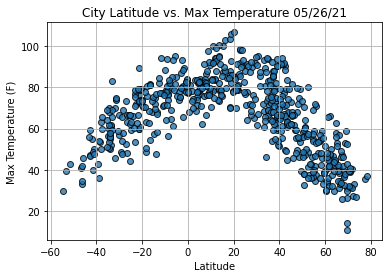

In [237]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

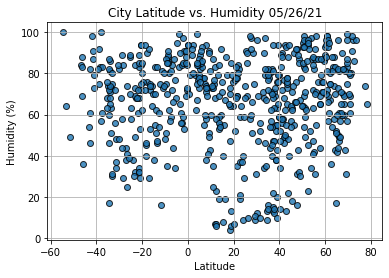

In [238]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

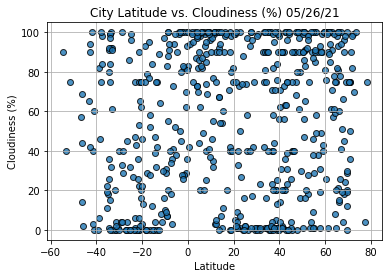

In [239]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

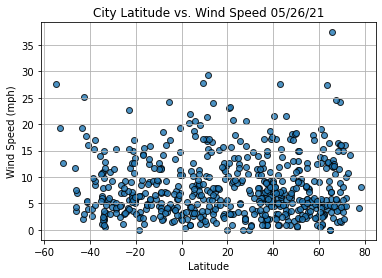

In [240]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [241]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [242]:
index13 = city_data_df.loc[13]
index13

City                   Georgetown
Country                        MY
Date          2021-05-26 18:08:48
Lat                        5.4112
Lng                       100.335
Max Temp                    83.89
Humidity                       82
Cloudiness                     20
Wind Speed                   7.07
Name: 13, dtype: object

In [243]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Moyale,KE,2021-05-26 18:09:51,3.5167,39.0584,68.43,62,87,4.25
3,Porto Novo,BJ,2021-05-26 18:09:51,6.4965,2.6036,82.85,78,49,8.48
6,Xining,CN,2021-05-26 18:09:52,36.6167,101.7667,53.85,40,71,1.50
11,Kapaa,US,2021-05-26 18:09:31,22.0752,-159.3190,78.78,84,40,8.84
12,Thompson,CA,2021-05-26 18:09:54,55.7435,-97.8558,41.94,31,85,7.83


In [244]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

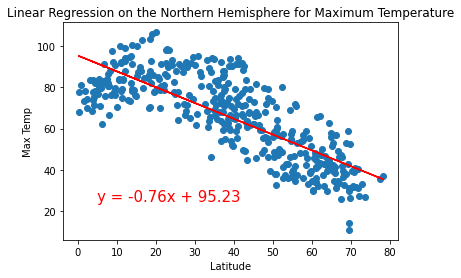

In [245]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(5,25))

In [246]:
linregress(x_values, y_values)

LinregressResult(slope=-0.7627506586651916, intercept=95.22501426998014, rvalue=-0.7911378769441514, pvalue=1.6953907859344854e-88, stderr=0.029301999412029187)

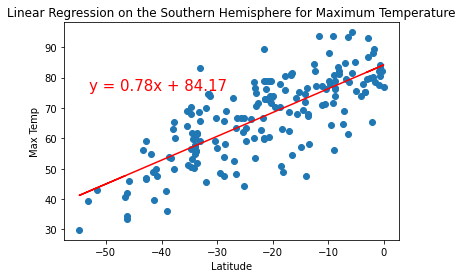

In [262]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-53,76))

In [263]:
linregress(x_values, y_values)

LinregressResult(slope=0.7838048718109826, intercept=84.17348460583273, rvalue=0.7613671380095338, pvalue=6.655874646841241e-36, stderr=0.0496094729150913)

In [264]:
linregress(x_values, y_values).rvalue

0.7613671380095338

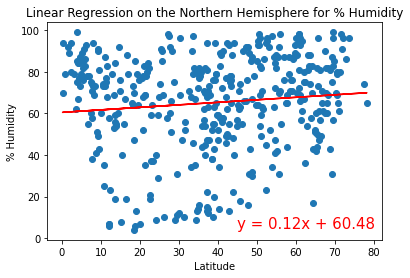

In [265]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Humidity', '% Humidity',(45,5))

In [266]:
linregress(x_values, y_values).rvalue

0.10612088663884543

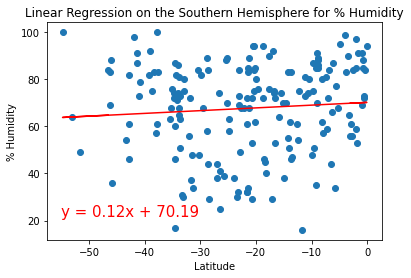

In [268]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Humidity', '% Humidity',(-55,22))

In [269]:
linregress(x_values, y_values).rvalue

0.07991569691252098

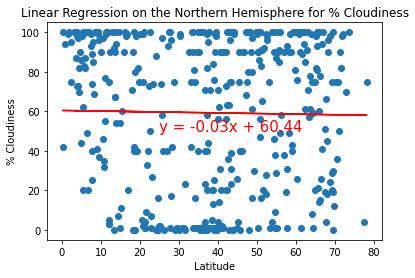

In [270]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for % Cloudiness', '% Cloudiness',(25,50))

In [271]:
linregress(x_values, y_values).rvalue

-0.01685778731319354

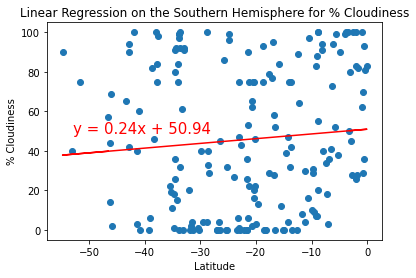

In [273]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for % Cloudiness', '% Cloudiness',(-53,49))

In [274]:
linregress(x_values, y_values).rvalue

0.08768395002635591

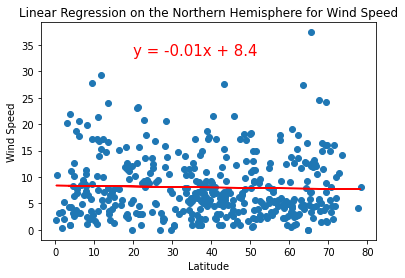

In [275]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
for Wind Speed', 'Wind Speed',(20,33))

In [276]:
linregress(x_values, y_values).rvalue

-0.0317513279056194

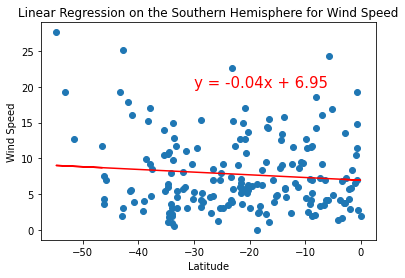

In [277]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
for Wind Speed', 'Wind Speed',(-30,20))

In [278]:
linregress(x_values, y_values).rvalue

-0.09574118955375131